Logistic Regression with Regularization: Andrew Ng Machine Learning (from Octave to Jupyter Python notebook) ex2_reg

In [103]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize

os.chdir('/Users/Alison/Desktop/BigData_Analytics/Andrew Ng/machine-learning-ex2/ex2')
# Load Data - The first two columns contains the exam scores and the third column contains the label.
df = pd.read_csv('ex2data2.txt', header=None)
X = df.iloc[:,0:2]
y = df.iloc[:,2]

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



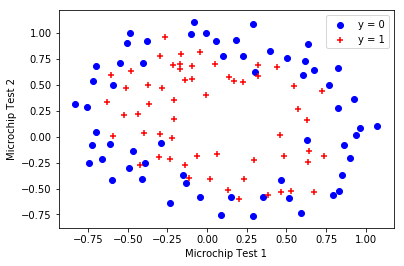

In [27]:
# First plot the data to understand the problem we are working with.
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n')
X0 = df.loc[df[2] == 0, [0,1]]
X1 = df.loc[df[2] == 1, [0,1]]
plt.scatter(X0[0], X0[1], marker='o', c='b', label='y = 0')
plt.scatter(X1[0], X1[1], marker='+', c='r', label='y = 1')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.show()

In [113]:
#Setup the data matrix appropriately
m, n = X.shape
# Add Polynomial Features
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
X_padded = poly.fit_transform(X)
#Set regularization parameter lambda to 1
lambda_reg = 1

In [140]:
#Initialize fitting parameters
initial_theta = pd.DataFrame(np.zeros((X_padded.shape[1], 1)))

def sigmoid(z):
    #SIGMOID Compute sigmoid function
    #g = SIGMOID(z) computes the sigmoid of z.
    g=1/(1+np.exp(-z))
    return g

def costFunctionReg(theta, X, y, lambda_reg):
    #COSTFUNCTION Compute cost for logistic regression
    #J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    #parameter for logistic regression 
    m = y.shape[0] #number of training examples
    h=sigmoid(np.dot(theta.T,X.T))
    unregularized_cost = (1/m)*(np.dot(-y.T,np.log(h).T)-np.dot((1-y).T,np.log(1-h).T))

    sum_squares_theta = np.sum(np.square(theta[1:]))
    regularization = (lambda_reg/(2*m))*sum_squares_theta
    
    J = unregularized_cost + regularization
    
    return J

def gradReg(theta, X, y, lambda_reg):
    #GRAD Compute gradient for logistic regression
    #grad = GRAD(theta, X, y) computes the gradient using theta as the
    #parameter for logistic regression
    m = y.shape[0] #number of training examples
    h=sigmoid(np.dot(theta.T,X.T))
    
    regularization_grad = (lambda_reg/m)*theta
    regularization_grad[0]=0
    grad = (1/m)*np.dot(X.T,(h.T-y.to_frame())) + regularization_grad
    return grad

In [141]:
# Compute and display initial cost and gradient for regularized logistic regression
cost = costFunctionReg(initial_theta, X_padded, y, lambda_reg)
grad = gradReg(initial_theta, X_padded, y, lambda_reg)

print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:', grad[0:5])
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros): 0    0.693147
dtype: float64
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:           0
0  0.008475
1  0.018788
2  0.000078
3  0.050345
4  0.011501
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [142]:
# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = pd.DataFrame(np.ones((X_padded.shape[1], 1)))
lambda_reg=10
cost = costFunctionReg(test_theta, X_padded, y, lambda_reg)
grad = gradReg(test_theta, X_padded, y, lambda_reg)

print('\nCost at test theta (with lambda = 10):', cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:', grad[0:5])
print('Expected gradients (approx) - first five values only:')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')


Cost at test theta (with lambda = 10): 0    3.164509
dtype: float64
Expected cost (approx): 3.16

Gradient at test theta - first five values only:           0
0  0.346045
1  0.076606
2  0.110050
3  0.142117
4  0.007440
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



In [162]:
#Try different values of lambda and see how regularization affects the decision boundary
#Try the following values of lambda (0, 1, 10, 100).
#How does the decision boundary change when you vary lambda? 
#How does the training set accuracy vary?

#Initialize fitting parameters
initial_theta = pd.DataFrame(np.zeros((X_padded.shape[1], 1)))

#Set regularization parameter lambda
lambda_reg = 1
myargs=(X_padded, y, lambda_reg)
res = minimize(costFunctionReg, initial_theta, args=myargs, method=None, options={'maxiter':3000})
print('Cost at theta found by minimize:', costFunctionReg(res.x, X_padded, y, lambda_reg))

Cost at theta found by minimize: 0.529002742286


In [165]:
#Compute accuracy on our training set
def predict (theta, X):
    #PREDICT Predict whether the label is 0 or 1 using learned logistic regression parameters theta
    #p = PREDICT(theta, X) computes the predictions for X using a threshold at 0.5 
    #(i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    m = y.shape[0] #number of training examples
    p = sigmoid(np.dot(X,theta)) >= 0.5
    return p*1

# Accuracy
p = predict(res.x, X_padded)
accuracy = sum((p == y)*1)/len(p) * 100
print ('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), lambda_reg))

Train accuracy 83.05% with Lambda = 1


/Users/Alison/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


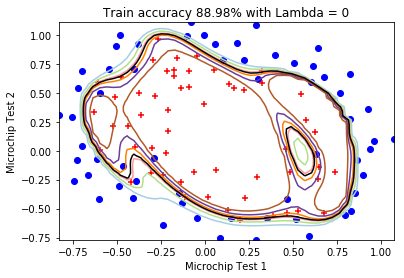

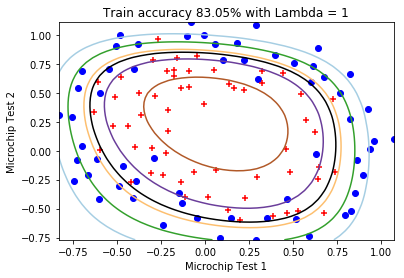

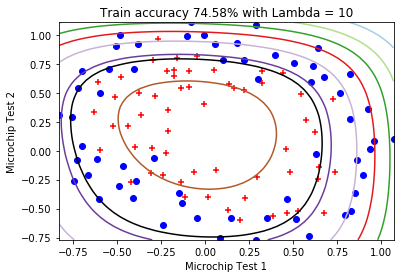

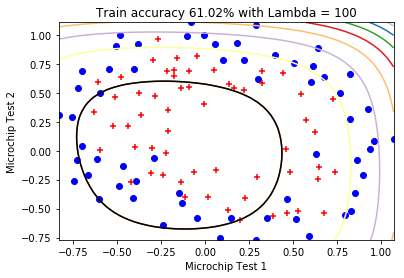

In [168]:
from scipy.optimize import minimize
#http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%202%20-%20Logistic%20Regression.ipynb
plt.clf()

# Decision boundaries

for i, C in enumerate([0, 1, 10, 100]):
    # Optimize costFunctionReg
    lambda_reg = C
    myargs=(X_padded, y, lambda_reg)
    res = minimize(costFunctionReg, initial_theta, args=myargs, method=None, options={'maxiter':3000})
    p = predict(res.x, X_padded)
    accuracy = sum((p == y)*1)/len(p) * 100

    # Scatter plot of X,y  
    # Plot decisionboundary
    plt.xlim(X[0].min(), X[0].max())
    plt.ylim(X[1].min(), X[1].max())
    X0 = df.loc[df[2] == 0, [0,1]]
    X1 = df.loc[df[2] == 1, [0,1]]
    plt.scatter(X0[0], X0[1], marker='o', c='b', label='y = 0')
    plt.scatter(X1[0], X1[1], marker='+', c='r', label='y = 1')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    xx1, xx2 = np.meshgrid(np.linspace(X[0].min(), X[0].max()), np.linspace(X[1].min(), X[1].max()))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res.x))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, cmap=plt.cm.Paired)
    plt.contour(xx1, xx2, h, [0.5], colors='k')
    plt.title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))
    plt.show()